# PCA Model Task

### 1) Data Preparation

In [329]:
#!pip install tflearn

Importing packages

In [1]:
import datetime
import pandas as pd
from pandas import Series
from pandas import DataFrame
from pandas import concat
import numpy as np
import time, datetime
import matplotlib.pyplot as plt
import sys
import string
from collections import Counter
from nltk import ngrams
import itertools
import random
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.datasets import make_classification  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score  

Reading the data, converting the time to timestamp and indexing the date to use it as a time series

In [331]:
#Data Paths
DATA_PATH = sys.path[0]+"\\data\\"
filename_train1="BATADAL_dataset03.csv"
filename_train2="BATADAL_dataset04.csv"
filename_test="BATADAL_test_dataset.csv"

#Reading the data
dftrain1  = pd.read_csv(DATA_PATH + filename_train1)
dftrain2  = pd.read_csv(DATA_PATH + filename_train2)
dftest  = pd.read_csv(DATA_PATH + filename_test)

# Modify string date to timestamp
dftrain1.DATETIME = dftrain1.DATETIME.apply(lambda s: pd.to_datetime(s,format='%d/%m/%y %H'))
dftrain2.DATETIME = dftrain2.DATETIME.apply(lambda s: pd.to_datetime(s,format='%d/%m/%y %H'))
dftest.DATETIME = dftest.DATETIME.apply(lambda s: pd.to_datetime(s,format='%d/%m/%y %H'))

# Choosing 0 if not an anomaly and 1 if anomaly
dftrain2[' ATT_FLAG']=dftrain2[' ATT_FLAG'].apply(lambda x: 0 if x==-999 else x)

# Indexing
dftrain1=dftrain1.set_index('DATETIME')
dftrain2=dftrain2.set_index('DATETIME')
dftest=dftest.set_index('DATETIME')

#dftrain1.shift(1)

Scaling the data to normal distribution with mean zero and standard deviation one and plotting one column to validate the execution

In [332]:
# Getting one column to test the code
dataset=dftrain1['L_T7']

([], <a list of 0 Text xticklabel objects>)

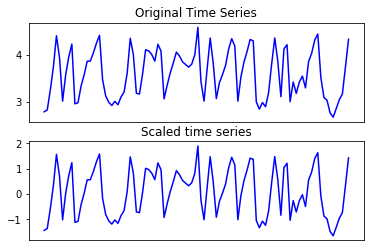

In [333]:
## Creating a function that scale and standardize a dataset
def scaling(mu,std,data):
    scaler = TimeSeriesScalerMeanVariance(mu=mu, std=std)
    return scaler.fit_transform(data)

## Running the function
dataset_scale=scaling(0,1,dataset)

## Plotting the first 100 observations to check if it worked

# Plotting the original time series
plt.figure()
plt.subplot(2, 1, 1)  # First, raw time series
plt.plot(dataset[0:100], "b-")
plt.title("Original Time Series")
plt.xticks([])

# Plotting the scaled time series
plt.subplot(2, 1, 2)  # Second, PAA
plt.plot(dataset_scale.ravel()[0:100], "b-")
plt.title("Scaled time series")
plt.xticks([])

## 2) Discretization 